In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path


In [2]:


filepath = Path('../data/merged_weather_bike_data.csv')

# Read and display Csv data

weather_bike_df = pd.read_csv(filepath, encoding='utf-8', delimiter=',',)

weather_bike_df.head() 


,ride_id,start_day,start_hour,trip_length,start_station_name,member_casual,rideable_type,temp,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description
0,71AFDB68CD4B2F10,2020-04-01,3,0 days 00:08:45,Emerald Ave & 28th St,member,docked_bike,3.24,1.13,-2.18,2.77,4.02,1018,86,8.2,360,100,804,Clouds,overcast clouds
1,045670E8C86D60F8,2020-04-01,5,0 days 00:07:21,Kimbark Ave & 53rd St,member,docked_bike,3.27,1.16,-1.59,2.77,4.02,1018,86,6.7,350,100,804,Clouds,overcast clouds
2,E011081FDFFEC179,2020-04-01,6,0 days 00:36:41,Halsted St & 37th St,casual,docked_bike,3.27,0.99,-1.97,2.77,4.02,1018,85,7.7,340,100,804,Clouds,overcast clouds
3,8AC0C3A4172436F8,2020-04-01,6,0 days 00:04:31,Harper Ave & 59th St,member,docked_bike,3.27,0.99,-1.97,2.77,4.02,1018,85,7.7,340,100,804,Clouds,overcast clouds
4,90B0B0B44D118FCB,2020-04-01,6,0 days 00:04:05,State St & 29th St,member,docked_bike,3.27,0.99,-1.97,2.77,4.02,1018,85,7.7,340,100,804,Clouds,overcast clouds


In [15]:

# Count the occurrences of each weather category in the 'weather_main' column
weather_counts = weather_bike_df['weather_main'].value_counts()

# Print the weather counts
print("Weather counts per category:")
print(weather_counts)

Weather counts per category:
weather_main
Clouds          769085
Rain            118911
Clear           109801
Mist             16603
Snow             13390
Smoke             6674
Thunderstorm      3950
Drizzle           3604
Haze              2019
Fog                681
Name: count, dtype: int64


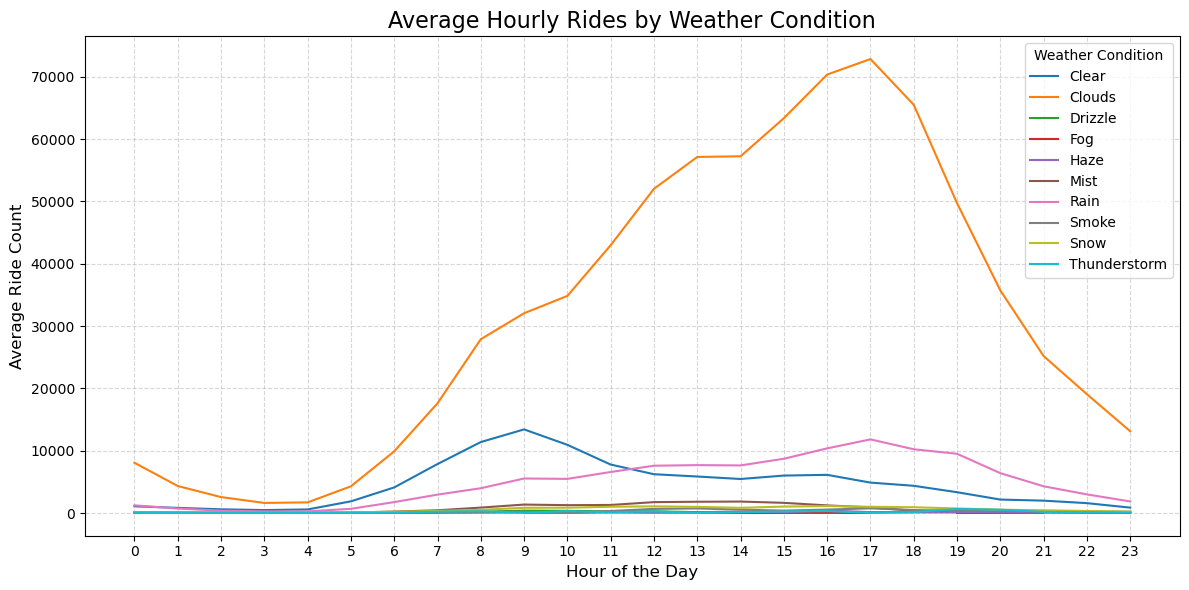

In [3]:
# Group data by 'start_hour' and 'weather_main', then calculate the average rides
hourly_weather = weather_bike_df.groupby(['start_hour', 'weather_main']).agg({'ride_id': 'count'}).reset_index()

# Rename column for clarity
hourly_weather.rename(columns={'ride_id': 'ride_count'}, inplace=True)

# Pivot the data for plotting          
pivot_data = hourly_weather.pivot(index='start_hour', columns='weather_main', values='ride_count')

# Plot the line chart
plt.figure(figsize=(12, 6))
for weather in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[weather], label=weather)

# Adding labels, title, and legend
plt.title('Average Hourly Rides by Weather Condition', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Ride Count', fontsize=12)
plt.xticks(range(0, 24))  # Show all hours
plt.legend(title="Weather Condition")
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()


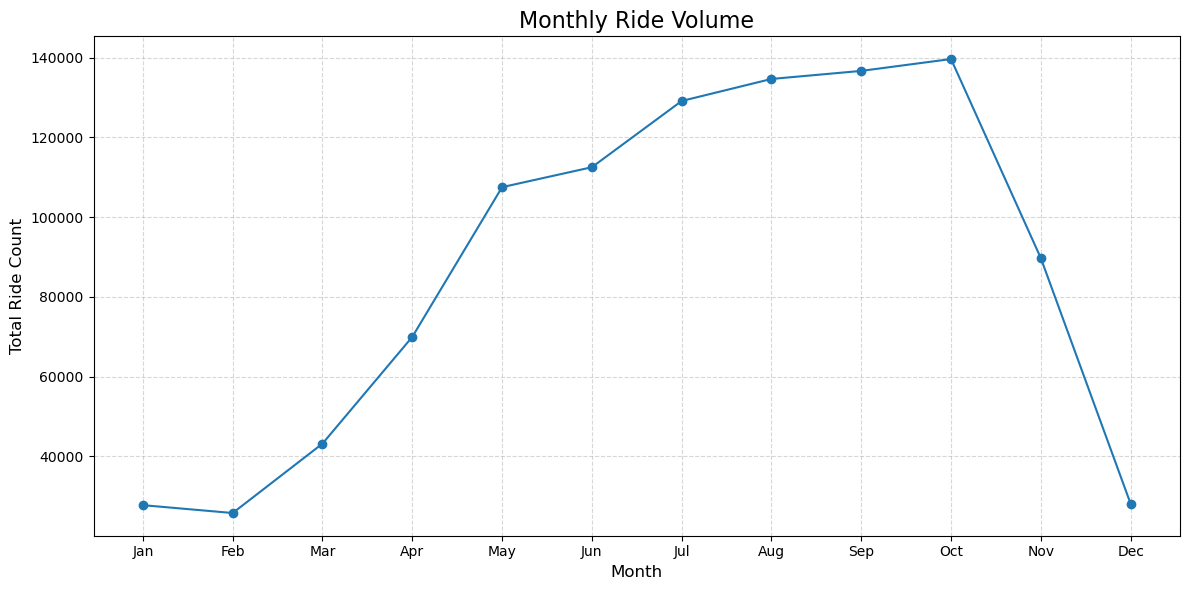

In [5]:
# Convert 'start_day' to datetime if it's not already
weather_bike_df['start_day'] = pd.to_datetime(weather_bike_df['start_day'])

# Extract the month from the 'start_day' column
weather_bike_df['start_month'] = weather_bike_df['start_day'].dt.month

# Group by 'start_month' and sum the ride counts (using 'ride_id')
monthly_ride_volume = weather_bike_df.groupby('start_month').agg({'ride_id': 'count'}).reset_index()

# Rename column for clarity
monthly_ride_volume.rename(columns={'ride_id': 'ride_count'}, inplace=True)

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_ride_volume['start_month'], monthly_ride_volume['ride_count'], marker='o')

# Adding labels, title, and grid
plt.title('Monthly Ride Volume', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Ride Count', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

#:Level 1 Q4

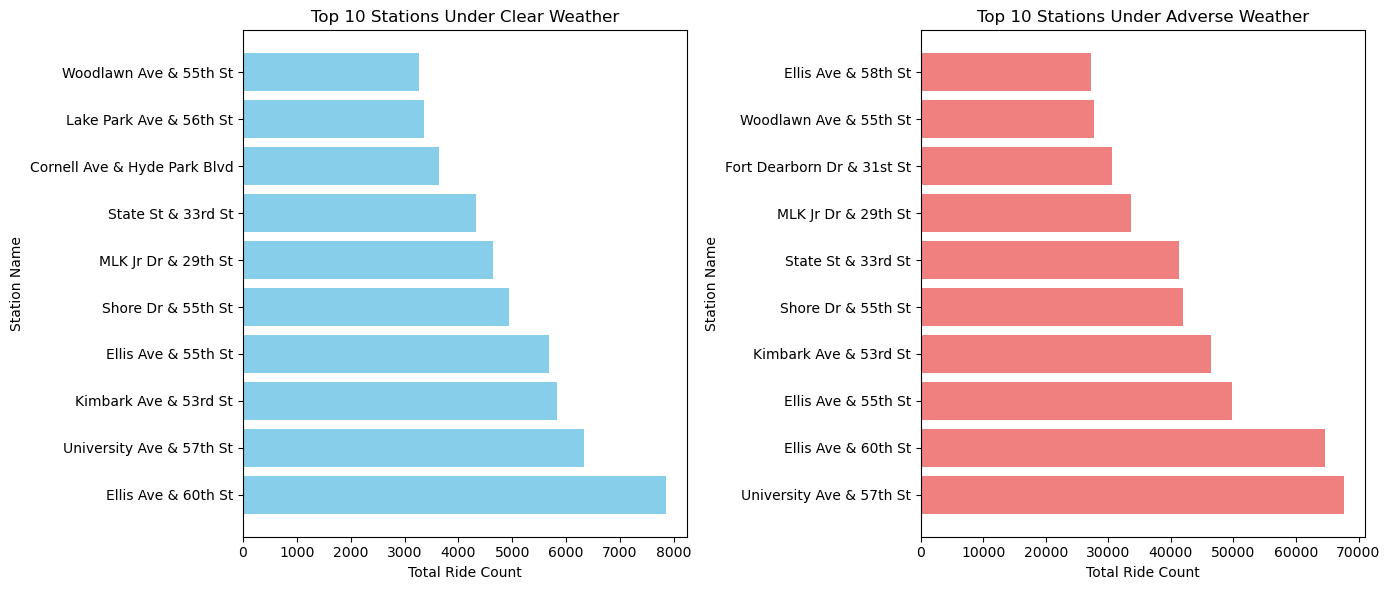

In [7]:


# Filter data into "clear" and "adverse" weather conditions
clear_weather = weather_bike_df[weather_bike_df['weather_main'] == 'Clear']
adverse_weather = weather_bike_df[~weather_bike_df['weather_main'].isin(['Clear'])]

# Group by station name and calculate the total ride count
clear_station_activity = clear_weather.groupby('start_station_name').agg({'ride_id': 'count'}).reset_index()
adverse_station_activity = adverse_weather.groupby('start_station_name').agg({'ride_id': 'count'}).reset_index()

# Sort the stations by ride count in descending order and take the top 10
top_10_clear_stations = clear_station_activity.sort_values(by='ride_id', ascending=False).head(10)
top_10_adverse_stations = adverse_station_activity.sort_values(by='ride_id', ascending=False).head(10)

# Plotting both charts side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Clear Weather
axes[0].barh(top_10_clear_stations['start_station_name'], top_10_clear_stations['ride_id'], color='skyblue')
axes[0].set_title('Top 10 Stations Under Clear Weather')
axes[0].set_xlabel('Total Ride Count')
axes[0].set_ylabel('Station Name')

# Plot for Adverse Weather
axes[1].barh(top_10_adverse_stations['start_station_name'], top_10_adverse_stations['ride_id'], color='lightcoral')
axes[1].set_title('Top 10 Stations Under Adverse Weather')
axes[1].set_xlabel('Total Ride Count')
axes[1].set_ylabel('Station Name')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Level 1 Question 5

<Figure size 1000x600 with 0 Axes>

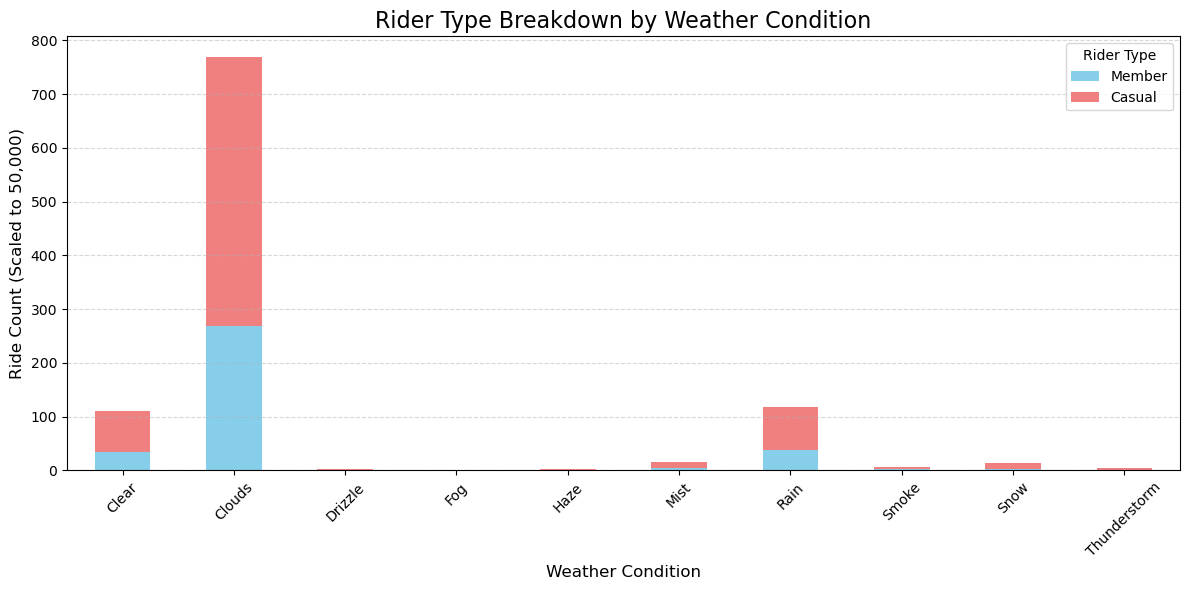

In [13]:
# Group data by 'weather_main' and 'member_casual', then count the rides
rider_type_by_weather = weather_bike_df.groupby(['weather_main', 'member_casual']).agg({'ride_id': 'count'}).reset_index()

# Pivot the data so that 'member_casual' values become columns
pivot_rider_type = rider_type_by_weather.pivot(index='weather_main', columns='member_casual', values='ride_id').fillna(0)

# Scale the ride count by 50,000 (instead of 100,000)
pivot_rider_type = pivot_rider_type / 1000  # This divides all counts by 2, changing them from 100,000 to 50,000

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
pivot_rider_type.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'], figsize=(12, 6))

# Adding labels, title, and legend
plt.title('Rider Type Breakdown by Weather Condition', fontsize=16)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Ride Count (Scaled to 50,000)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Rider Type', labels=['Member', 'Casual'])
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

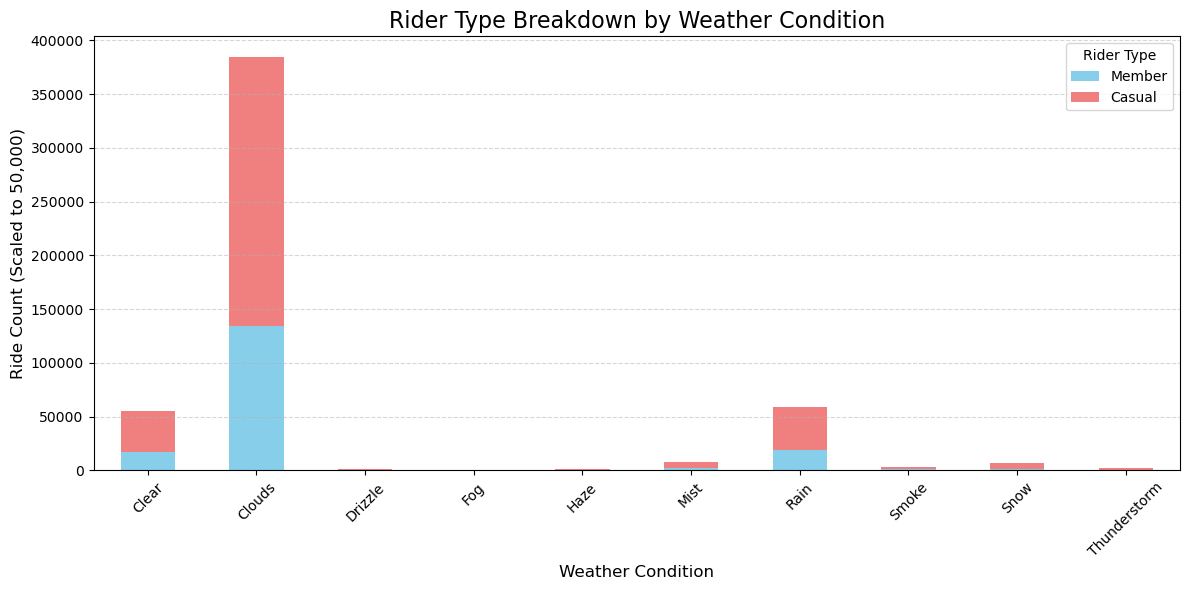

In [14]:
# Group data by 'weather_main' and 'member_casual', then count the rides
rider_type_by_weather = weather_bike_df.groupby(['weather_main', 'member_casual']).agg({'ride_id': 'count'}).reset_index()

# Pivot the data so that 'member_casual' values become columns
pivot_rider_type = rider_type_by_weather.pivot(index='weather_main', columns='member_casual', values='ride_id').fillna(0)

# Scale the ride count by 50,000 (instead of 100,000)
pivot_rider_type = pivot_rider_type / 2  # This divides all counts by 2, changing them from 100,000 to 50,000

# Ensure all possible weather categories are included, even if they have zero rides
# List of expected weather conditions (add any others you expect to see)
expected_weather_conditions = ['Clear', 'Rain', 'Drizzle', 'Fog', 'Snow']

# Add any missing weather conditions with zero rides
for condition in expected_weather_conditions:
    if condition not in pivot_rider_type.index:
        pivot_rider_type.loc[condition] = [0, 0]  # Adding zero counts for both rider types

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
pivot_rider_type.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'], figsize=(12, 6))

# Adding labels, title, and legend
plt.title('Rider Type Breakdown by Weather Condition', fontsize=16)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Ride Count (Scaled to 50,000)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Rider Type', labels=['Member', 'Casual'])
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()